In [3]:
import numpy as np
import pandas as pd


# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [4]:

import pandas as pd
data_ = pd.read_csv("../data/adult.csv")
data_.info()
data_ = data_[~data_.apply(lambda row: row.astype(str).str.contains('\?', regex=False).any(), axis=1)]
salary = data_['salary']
salary_k = data_['salary K$']
print(salary.head())
print(salary_k.head())
print(salary.tail())
print(salary_k.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  salary          32561 non-null  object
 12  salary K$       32561 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object
0    39
1    35
2    27
3    43
4    25
Name: salary K$, dtype: int64
32556    <=50K
32557     >50

pri# Task 1
Print the count of men and women in the dataset.

In [5]:
gender_counts = data_['sex'].value_counts()
print(gender_counts)

sex
Male      21790
Female    10771
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [17]:
data_ = pd.read_csv("../data/adult.csv")
data_.head()
male_= data_[data_["sex"] == "Male"]
avg_age = male_["age"].mean()
print("Average age", round(avg_age, 2))


39.43


# Task 3
Get the percentage of people from Poland (native-country)

In [20]:
poland_ = data_[data_["native-country"] == "Poland"]
poland_people = poland_.shape[0]
print("Poland" ,poland_people)

Poland 60


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [25]:
high_salary = data_[data_["salary"] == ">50K"]
high_salary_age_mean = high_salary["age"].mean()
high_salary_age_std = high_salary["age"].std()
low_salary = data_[data_["salary"] == "<=50K"]
low_salary_age_mean = low_salary["age"].mean()
low_salary_age_std = low_salary["age"].std()
print("Age mean for >50K", round(high_salary_age_mean))
print("Age std for >50K", round(high_salary_age_std))
print("Age mean for <=50K", round(low_salary_age_mean))
print("Age std for <=50K", round(low_salary_age_std))


Age mean for >50K 44
Age std for >50K 11
Age mean for <=50K 37
Age std for <=50K 14


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [28]:
without_higher_education = data_[~(data_["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]))]
high_salary_without_higer_education = without_higher_education[without_higher_education["salary"] == ">50K"]
print(high_salary_without_higer_education)

       Unnamed: 0  age         workclass     education      marital-status   
7               7   52  Self-emp-not-inc       HS-grad  Married-civ-spouse  \
10             10   37           Private  Some-college  Married-civ-spouse   
27             27   54                 ?  Some-college  Married-civ-spouse   
38             38   31           Private  Some-college  Married-civ-spouse   
55             55   43           Private  Some-college  Married-civ-spouse   
...           ...  ...               ...           ...                 ...   
32510       32510   39           Private       HS-grad  Married-civ-spouse   
32518       32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519       32519   46           Private  Some-college  Married-civ-spouse   
32557       32557   40           Private       HS-grad  Married-civ-spouse   
32560       32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

              occupation relationship                race     s

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [30]:
age_statistics_by_education = data_.groupby("education")["age"].describe()
print(age_statistics_by_education)

                count       mean        std   min    25%   50%   75%   max
education                                                                 
10th            933.0  37.429796  16.720713  17.0  22.00  34.0  52.0  90.0
11th           1175.0  32.355745  15.545485  17.0  18.00  28.0  43.0  90.0
12th            433.0  32.000000  14.334625  17.0  19.00  28.0  41.0  79.0
1st-4th         168.0  46.142857  15.615625  19.0  33.00  46.0  57.0  90.0
5th-6th         333.0  42.885886  15.557285  17.0  29.00  42.0  54.0  84.0
7th-8th         646.0  48.445820  16.092350  17.0  34.25  50.0  61.0  90.0
9th             514.0  41.060311  15.946862  17.0  28.00  39.0  54.0  90.0
Assoc-acdm     1067.0  37.381443  11.095177  19.0  29.00  36.0  44.0  90.0
Assoc-voc      1382.0  38.553546  11.631300  19.0  30.00  37.0  46.0  84.0
Bachelors      5355.0  38.904949  11.912210  19.0  29.00  37.0  46.0  90.0
Doctorate       413.0  47.702179  11.784716  24.0  39.00  47.0  55.0  80.0
HS-grad       10501.0  38

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [33]:
data_male = data_[data_["sex"] == "Male"]
married_men = data_male[data_male["marital-status"].str.startswith("Married")]
non_married_men = data_male[~data_male["marital-status"].str.startswith("Married")]
married_men_high= married_men[married_men["salary"] == ">50K"]
mean_salary_married_men = married_men_high["salary K$"].mean()
non_married_men_high = non_married_men[non_married_men["salary"] == ">50K"]
mean_salary_non_married_men = non_married_men["salary K$"].mean()
print("Married men", round(mean_salary_married_men))
print("Non married men", round(mean_salary_non_married_men))

Married men 201
Non married men 46


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [35]:
max_hours_per_week = data_["hours-per-week"].max()
same_max_hours_per_week = data_[data_["hours-per-week"] == max_hours_per_week].shape[0]
print("Max hours", max_hours_per_week)
print("Amount with max_hours", same_max_hours_per_week)

Max hours 99
Amount with max_hours 85


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

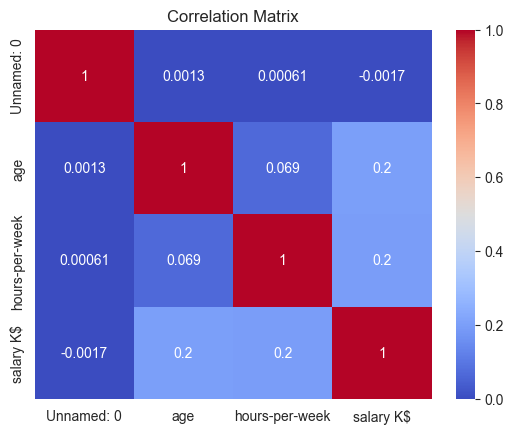

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = data_.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()